In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

import warnings
warnings.filterwarnings('ignore')

In [2]:
stud_mat = pd.read_csv(r"C:\Users\solen\Desktop\temporary\soft\Информатика\SkillFactory\рабочие файлы\stud_math.xls")

1 school — аббревиатура школы, в которой учится ученик  
2 sex — пол ученика ('F' - женский, 'M' - мужской)  
3 age — возраст ученика (от 15 до 22)  
4 address — тип адреса ученика ('U' - городской, 'R' - за городом)  
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)  
6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)  
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)  
10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)  
11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)  
12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)  
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)  
14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)  
15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)  
16 schoolsup — дополнительная образовательная поддержка (yes или no)  
17 famsup — семейная образовательная поддержка (yes или no)  
18 paid — дополнительные платные занятия по математике (yes или no)  
19 activities — дополнительные внеучебные занятия (yes или no)  
20 nursery — посещал детский сад (yes или no)  
21 higher — хочет получить высшее образование (yes или no)  
22 internet — наличие интернета дома (yes или no)  
23 romantic — в романтических отношениях (yes или no)  
24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)  
25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)  
26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)  
27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)  
28 absences — количество пропущенных занятий  
29 score — баллы по госэкзамену по математике  

####  EDA - не еда, или, просто говоря, поучимся делать разведывательный анализ данных

Для удобства анализа, разделим признаки на числовые и категориальные. К числовым относим:  
'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score'
 
К категориальным отнесем: 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'

Примечания:  
Некоторые признаки я отнес к числовым, хотя на первый взгляд, они являются категориальными.  
Medu - признак, на первый взгляд является категориальным, ведь цифры в нем отвечают за степерь образования матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее), но логика подсказывает, что в данной ситуации "4" это реально лучше чем "0". И человек имеющий высшее образование будет стремиться так же дать его и своим детям.  
'Fedu' - то же самое, что и с признаком образования матери.  
'traveltime' - время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.) на первый взгляд - признак категориальный, который показывает разные временные интервалы, необходимые для того, чтобы добраться до школы. Но с другой стороны, с точки зрения логики "0" намного лучше, чем "4", так как у ребенка остается больше свободного времени, которое можно потратить с пользой. Относим к числовому признаку.  
'studytime' — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов). Аналогично, на первый взгляд признак категориальный, но логика подсказывает, что чем больше ребенок занимается учебой самостоятельно - тем лучше у него подготовка. Относим к числовому.  
'failures' — количество внеучебных неудач (n, если 1<=n<3, иначе 0). Странный признак. Непонятно, что это такое. Для начала отнесем его к числовому, затем посмотрим на корреляцию с другими признаками, если ее не будет, то возможно отнесем данный тип к категориальному.




In [3]:
#Категориальные признаки
cat_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 
                'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
                'famsup', 'paid', 'activities', 'nursery', 'higher',
                'internet', 'romantic']
#Числовые признаки
num_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 
                'failures', 'famrel', 'freetime', 'goout', 'health', 
                'absences', 'score']

In [4]:
# Посмотрим на представленные данные
stud_mat.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0


In [5]:
# а также на информацию по колонкам
stud_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

Обратим внимание, что в данные попал один признак, про который нет описание - 'studytime, granular'. Перевод слова 'granular' нам также ничего не дает, но в названии есть 'studytime', описание которого есть. Посмотрим на эти два признака.

In [6]:
stud_mat[['studytime', 'studytime, granular']].head()

,studytime,"studytime, granular"
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0


На первый взгляд бросается в глаза, что 'studytime, granular' = -3*'studytime'
Посмотрим на матрицу корреляций между двумя признаками

In [7]:
stud_mat[['studytime', 'studytime, granular']].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


Видим, что признаки полностью скоррелированы друг с другом, признак непонятный, поэтому избавимся от него.

In [8]:
stud_mat.drop(['studytime, granular'], inplace = True, axis = 1)

### Теперь по порядку рассмотрим числовые признаки
###### Признак - 'age' — возраст ученика (от 15 до 22)

Пропусков в данном столбце нет. Посмотрим на выбросы и распределение

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

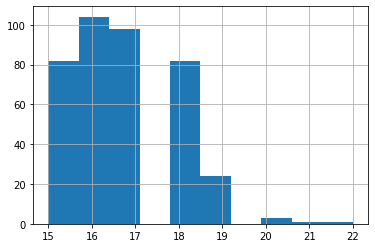

In [9]:
stud_mat['age'].hist()
stud_mat['age'].describe()

Сразу бросается в глаза, что в выборку попало мало учеников с возрастом старше 20 лет. Оценим, сколько таких (возможно таким уже неинтересно сдавать экзамены по математике)

In [10]:
stud_mat[stud_mat['age'] >= 20]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0
306,GP,M,20,U,GT3,A,3.0,2.0,services,other,course,other,1.0,1.0,0.0,no,no,no,yes,yes,yes,no,no,5.0,5.0,3.0,5.0,0.0,90.0
376,MS,F,20,NaN,GT3,T,4.0,2.0,health,other,course,NaN,2.0,3.0,2.0,no,yes,yes,no,no,yes,yes,yes,5.0,4.0,3.0,3.0,4.0,75.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0


Как видим, всего 5 человек в выборке имеют возраст 20 и старше. Причем из них 21 и 22 года - всего по одному человеку.  
<font color="red">Пометим себе, что возможно более целесообразно избавиться от информации про этих ребят. Либо просто добавить их к группе 19-летних (образовав группу, 19 и старше)</font>

###### Далее рассмотрим два признака 'Medu', 'Fedu'
Оба признака несут в себе информацию об образовании родителей.  
Как видно выше оба признака имеют пропуски, от которых нужно избавиться. Так как данных очень мало, считаю целесообразным пропуски заполнить на основании каких то других данных. Попробуем порассуждать каких...

In [11]:
#Посмотрим на корреляцию между двумя этими параметрами. 
#Сделаем отдельный датасет без пропусков и выбросов (вне условий задания)

mapa_edu = stud_mat[['Medu', 'Fedu']].dropna()
mapa_edu = mapa_edu[mapa_edu['Fedu'] <= 4]
mapa_edu.corr()

,Medu,Fedu
Medu,1.000000,0.629956
Fedu,0.629956,1.000000


Как видим, корреляция есть и она довольно высокая. Жизненный опыт также подсказывает, что, как правило, люди находят себе пару по своему уровню. Поэтому в основном датасете попробуем заменить пропуски в "Medu" и "Fedu" на аналогичные в них же.

In [12]:
for i in range(len(stud_mat['Fedu'])):
    if stud_mat['Fedu'][i] not in range(0, 4):
        stud_mat['Fedu'][i] = stud_mat['Medu'][i]
    if stud_mat['Medu'][i] not in range(0, 4):
        stud_mat['Medu'][i] = stud_mat['Fedu'][i]

Теперь посмотрим на распределение признаков

count    395.000000
mean       2.544304
std        0.992324
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Medu, dtype: float64

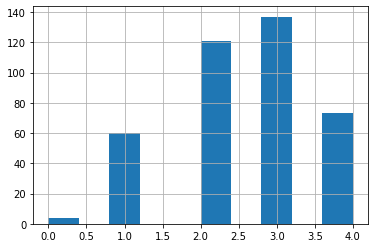

In [13]:
stud_mat['Medu'].hist()
stud_mat['Medu'].describe()

Как мы видим, в выборку попало очень мало мам, без образования (целых 4 шт.).

In [14]:
#Смотрим количество "нулевых" мам
stud_mat[stud_mat['Medu'] == 0]['Medu'].value_counts() 

0.0    4
Name: Medu, dtype: int64

count    395.000000
mean       2.458228
std        1.032543
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

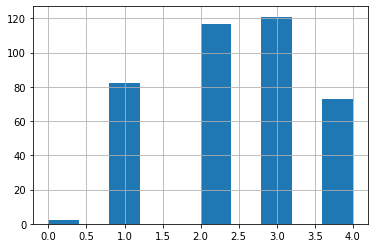

In [15]:
# Теперь посмотрим на пап.
stud_mat['Fedu'].hist()
stud_mat['Fedu'].describe()

In [16]:
#Смотрим количество "нулевых" пап
stud_mat[stud_mat['Fedu'] == 0]['Fedu'].value_counts() 

0.0    2
Name: Fedu, dtype: int64

Как видим, всего 2 папы и 4 мамы в выборке без образования. Данных слишком мало, поэтому будем считать информацию о таких родителях - выбросами.   
<font color="red">Пометим себе, что возможно более целесообразно избавиться от информации про таких родителей. Либо, возможно, за счет сильной корреляции, сделать на осноавнии данных об этих столбцах новый признак, учитывающий образование обоих родителей в целом</font>

###### Рассмотим признак 'traveltime' - время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

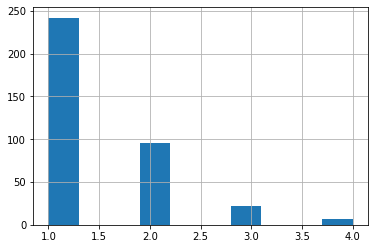

In [17]:
stud_mat['traveltime' ].hist()
stud_mat['traveltime' ].describe()

Как видим, в основном ученикам до школы меньше 15 мин. По логике (и iqr) получается, что тем, кому до школы более часа уже - выбросы.  Так же видим, что данных об учениках в категории 3 - немного.  
<font color = 'red'>При таком распределении было бы логичным:
- либо сделать данный признак категориальным - меньше 15 мин до школы (да - 1, нет - 0). Пропуски заполним медианным значением
- либо объединить группы 3 и 4 назвав их "до школы более получаса".</font>
Так как данных реально мало будем считать, что более логично сделать признак бинарным.

In [18]:
stud_mat['traveltime'] = stud_mat['traveltime'].apply(lambda x: 0 if x > 1 else 1)

In [19]:
#Уберем признак 'traveltime' из числовых признаков и добавим к категориальным
cat_features.append('traveltime')
num_features.remove('traveltime')

###### Рассмотрим признак 'studytime' — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

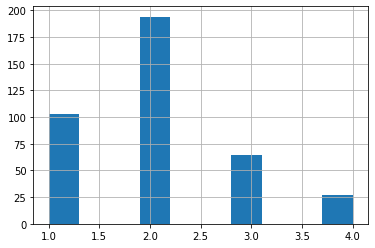

In [20]:
stud_mat['studytime'].hist()
stud_mat['studytime'].describe()

Видим, что есть пропуски, а так же видим, что учеников тратящих более 10 частов в неделю немного. По логике и iqr такие данные - выброс, поэтому предполагаю, что более разумно объеденить группы 3 и 4 данного признака - в один (более 5 часов в неделю). Пропуски заполним медианным значением. 

In [21]:
stud_mat['studytime'] = stud_mat['studytime'].apply(lambda x: 3 if x >= 3 
                                                    else stud_mat['studytime'].median() if pd.isnull(x)
                                                   else x)

count    395.000000
mean       1.969620
std        0.701042
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: studytime, dtype: float64

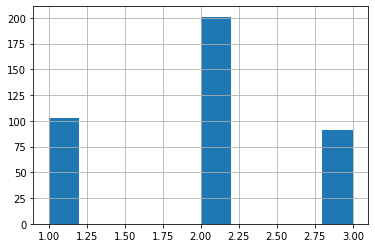

In [22]:
stud_mat['studytime'].hist()
stud_mat['studytime'].describe()

###### Рассмотрим признак 'failures' — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

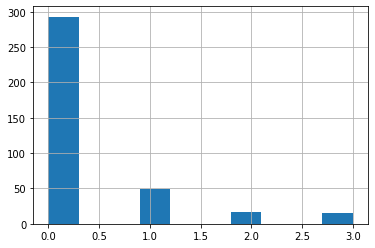

In [23]:
stud_mat['failures'].hist()
stud_mat['failures'].describe()

In [24]:
stud_mat[stud_mat['failures'] != 0]['failures'].value_counts()

1.0    49
2.0    16
3.0    15
Name: failures, dtype: int64

Очень мало признаков с количеством неудач более 1. Считаю целесообразным сделать данный признак категориальным (бинарным) - 1 - неудачи были, 0 - неудач не было. Пропуски заполним 0, так как их существенно больше.  
(так же уберем признак из числовых и добавим к категориальным)

In [25]:
stud_mat['failures'] = stud_mat['failures'].apply(lambda x: 1 if x >= 1 else 0)
cat_features.append('failures')
num_features.remove('failures')

###### Рассмотрим признак 'famrel' — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

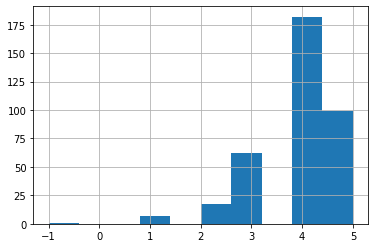

In [26]:
stud_mat['famrel'].hist()
stud_mat['famrel'].describe()

Видим, что есть выброс (-1), видим, что медиана - 4, видим, что в категории - 3 и меньше очень мало данных.
Считаю целесообразным сделать данный признак категориальным. 1 - хорошие отношения, 0 - отношения не очень хорошие (пропуски заполним 1, как преобладающим значением)

In [27]:
stud_mat['famrel'] = stud_mat['famrel'].apply(lambda x: 1 if x >= 4 or pd.isnull(x)
                                             else 0)

In [28]:
#так же уберем признак из числовых и добавим к категориальным
cat_features.append('famrel')
num_features.remove('famrel')

###### Рассмотрим признак  'freetime' — свободное время после школы (от 1 - очень мало до 5 - очень мого)

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

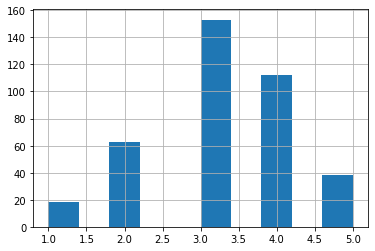

In [29]:
stud_mat['freetime'].hist()
stud_mat['freetime'].describe()

Видим нормальное распределение, правда мало данных когда времени очень мало и очень много.   
<font color = 'red'>Возможно есть смысл объединить группы 1 и 2, а также 4 и 5 </font>  
Пока оставим так как есть. Пропуски заполним медианным значением.

In [30]:
stud_mat['freetime'].fillna(stud_mat['freetime'].median(), inplace = True)

######  Рассмотрим признак 'goout' — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

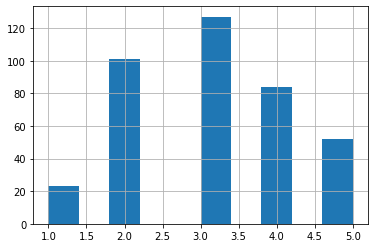

In [31]:
stud_mat['goout'].hist()
stud_mat['goout'].describe()

Так же как и с предидущим признаком видим, что распределение нормальное, хотя маловато данных на 1. 
Видим, что выбросов нет. Оставляем пока так.  
Пропуски заполним медианным значением

In [32]:
stud_mat['goout'].fillna(stud_mat['goout'].median(), inplace = True)

###### Рассмотрим признак 'health' — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

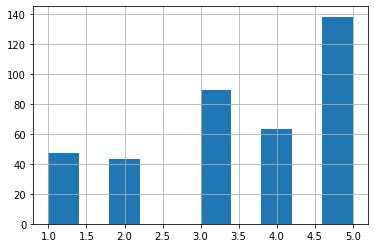

In [33]:
stud_mat['health'].hist()
stud_mat['health'].describe()

Можно порадоваться за учеников, все таки большинство с отличным здоровьем. Распределение более менее, пока оставим в таком виде. Пропуски заполним медианным значением.

In [34]:
stud_mat['health'].fillna(stud_mat['health'].median(), inplace = True)

###### Последний числовой признак - 'absences' — количество пропущенных занятий

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

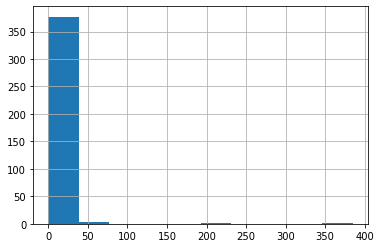

In [35]:
stud_mat['absences'].hist()
stud_mat['absences'].describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


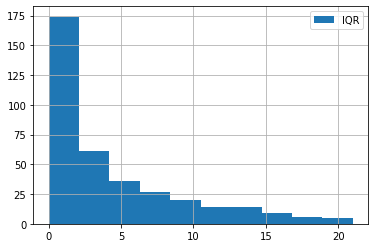

In [36]:
#Видим явные выбросы, посмотрим на них
median = stud_mat['absences'].median()
perc25 = stud_mat['absences'].quantile(0.25)
perc75 = stud_mat['absences'].quantile(0.75)
IQR = perc75 - perc25
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_mat['absences'].loc[stud_mat['absences'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 21), 
                                                                                             label = 'IQR')
plt.legend();

In [37]:
#Заполним пропуски медианой
#Чтобы не удалять строки с выбросами - приведем их к верхнему порогу по IQR
stud_mat['absences'].fillna(stud_mat['absences'].median())
stud_mat['absences'] = stud_mat['absences'].apply(lambda x: x if x < 20 else 20)

count    395.000000
mean       5.734177
std        6.245626
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       20.000000
Name: absences, dtype: float64

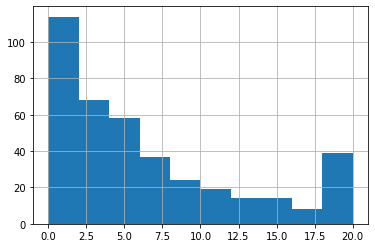

In [38]:
stud_mat['absences'].hist()
stud_mat['absences'].describe()

###### Теперь посмотрим на целевую переменную "score"

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

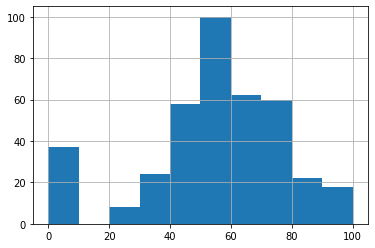

In [39]:
stud_mat['score'].hist()
stud_mat['score'].describe()

Не нравятся мне данные, где количество балов = 0. Больше похоже на то, что люди просто не сдавали экзамен по математике. Считаю целесобразным удалить не только пропуски целевой переменной, но и те данные, где она равна 0.


In [40]:
stud_mat = stud_mat[stud_mat['score'] > 0]

In [41]:
#посмотрим на корреляционную матрицу числовых признаков
stud_mat[num_features].corr()

,age,Medu,Fedu,studytime,freetime,goout,health,absences,score
age,1.000000,-0.066836,-0.124961,0.016431,0.001563,0.123597,-0.055674,0.224107,-0.131542
Medu,-0.066836,1.000000,0.798450,0.023489,0.012663,0.094084,0.017507,0.095644,0.148407
Fedu,-0.124961,0.798450,1.000000,-0.007979,-0.020199,0.074145,-0.008871,0.062119,0.112056
studytime,0.016431,0.023489,-0.007979,1.000000,-0.115430,-0.035046,-0.069539,-0.090765,0.132471
freetime,0.001563,0.012663,-0.020199,-0.115430,1.000000,0.294294,0.069643,0.005904,-0.014731
goout,0.123597,0.094084,0.074145,-0.035046,0.294294,1.000000,-0.007619,0.112385,-0.179913
health,-0.055674,0.017507,-0.008871,-0.069539,0.069643,-0.007619,1.000000,-0.052690,-0.078860
absences,0.224107,0.095644,0.062119,-0.090765,0.005904,0.112385,-0.052690,1.000000,-0.175616
score,-0.131542,0.148407,0.112056,0.132471,-0.014731,-0.179913,-0.078860,-0.175616,1.000000


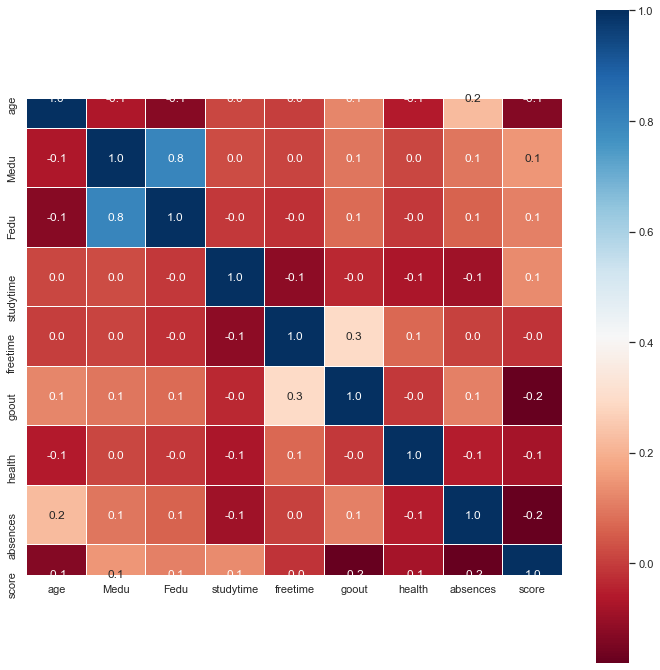

In [42]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(stud_mat[num_features].corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.01, cmap="RdBu")

Как видим из матрицы корреляций, есть существенная зависимость между образованием родителей, оставим только образование мамы, так как она чуть сильнее скоррелирована с целевой переменной, а так же можем убрать признак - 'freetime', так как видим, что корреляция с целевой переменной практически нулевая.

In [43]:
# Итак, в числовых признаках мы оставили
num_features.remove('Fedu')
num_features.remove('freetime')
num_features

['age', 'Medu', 'studytime', 'goout', 'health', 'absences', 'score']

### Теперь перейдем к категориальным признакам

Для удобства выделим бинарные признаки (по сути категориальный признак, принимающий два значения.  
К ним отнесем:  
'school' - как видим в выборке данный признак примает только два значения, если бы было больше мы бы отнесли его к категориальному.  
'sex' - слава Богу, в данном датасете все по старинке и всевозможных трансгендеров и прочих эльфов здесь нет. Всего два варианта, заложенных природой.  
'address' - в данном датасете опять же указывает, живешь ты в городе или нет. Два варианта.  
'famsize' - больше или меньше трех... Два варианта.  
'Pstatus' - два варианта - родители живут вместе или порознь.
Признаки 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic' так же имеют два варианта (yes или no)  
Так же мы помним, что сделали бинарными признаки 'traveltime', 'failures', 'famrel'

In [44]:
bin_features = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                'higher', 'internet', 'romantic', 'traveltime', 'failures', 'famrel']

In [45]:
#тогда в категориальных (с несколькими значениями) оставим:
for i in bin_features:
    cat_features.remove(i)
cat_features

['Mjob', 'Fjob', 'reason', 'guardian']

In [91]:
#Посмотрим боксплоты
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_mat.loc[stud_mat.loc[:, column].isin(stud_mat.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

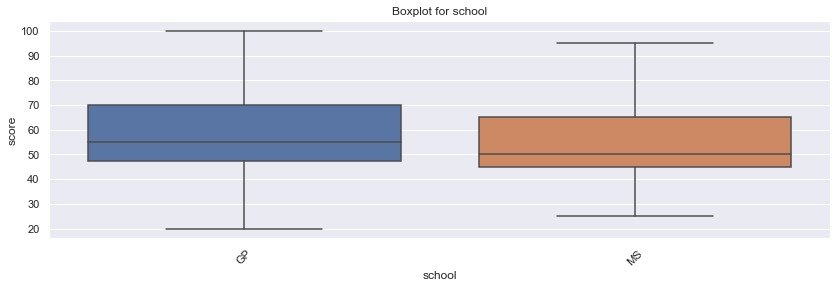

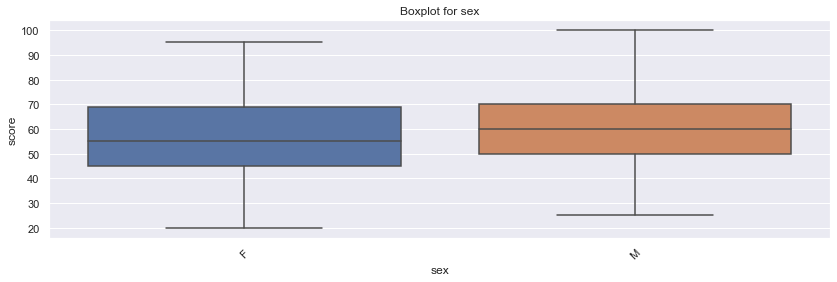

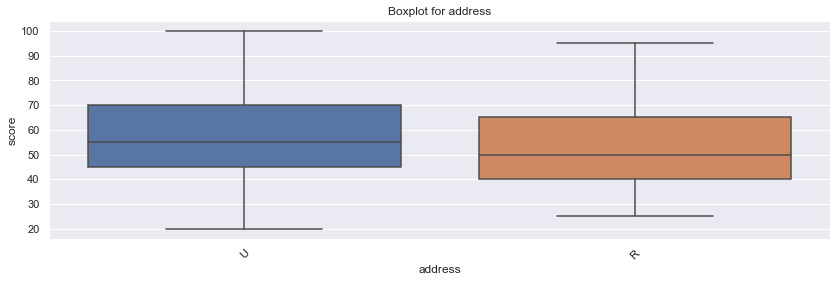

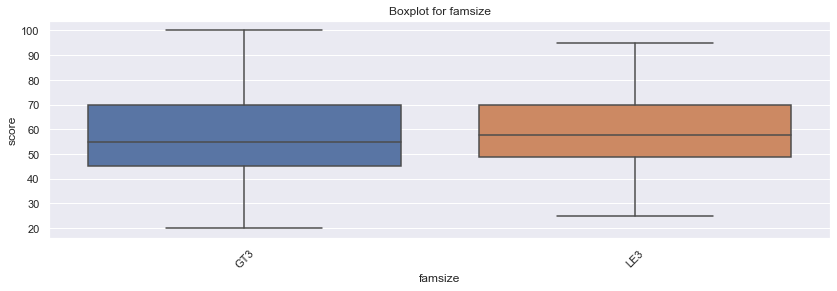

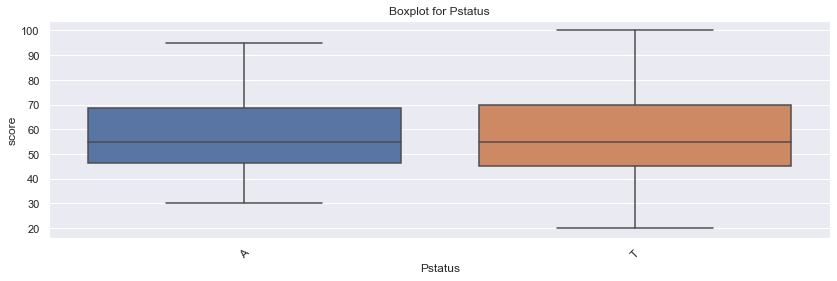

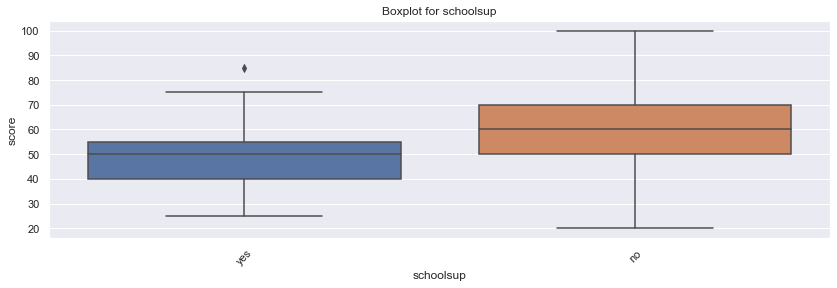

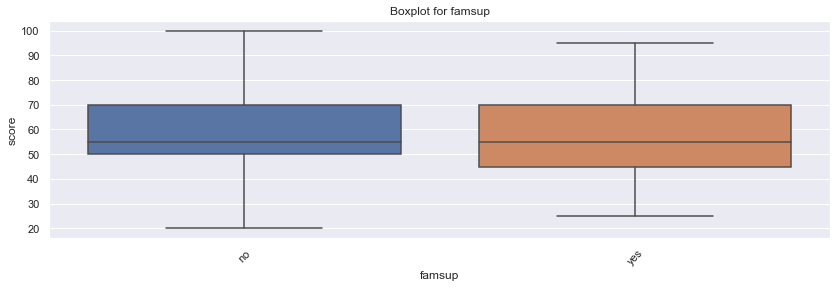

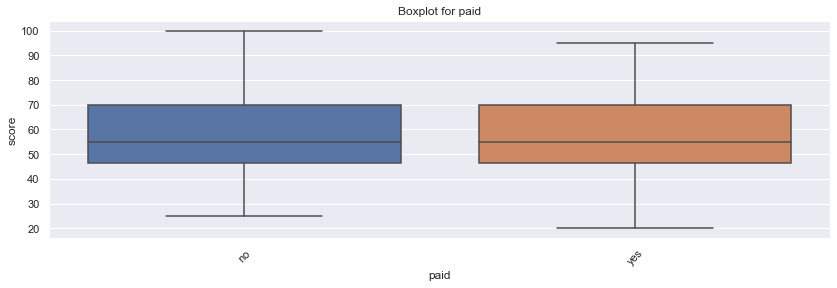

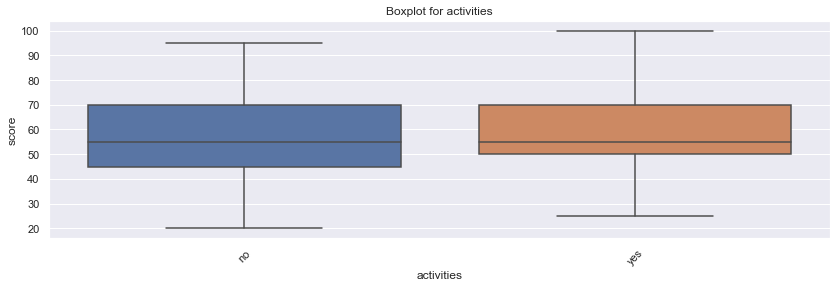

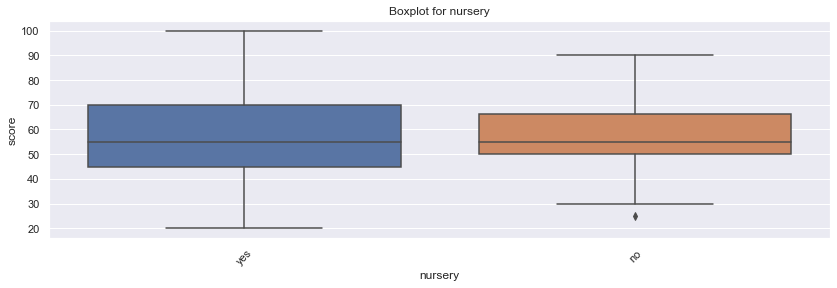

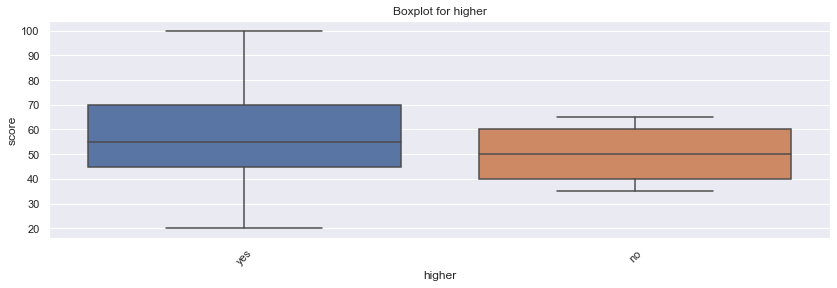

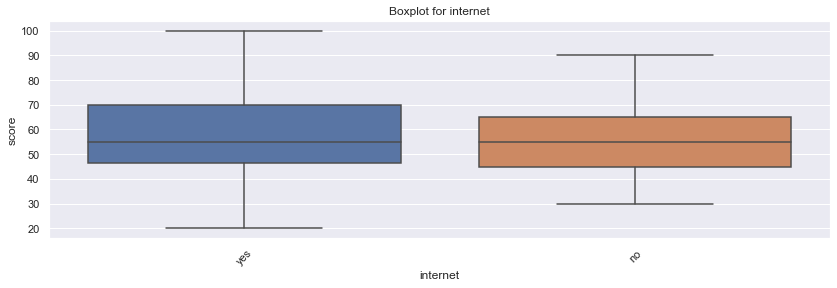

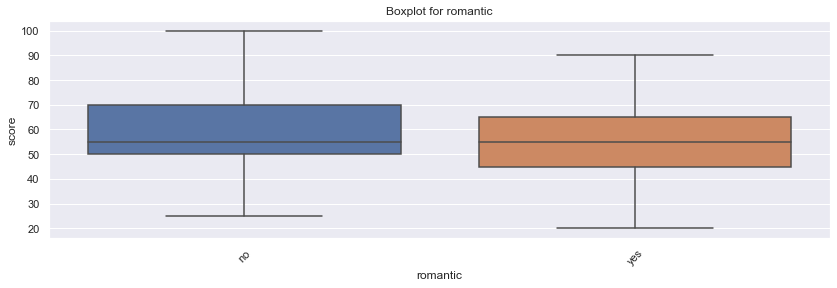

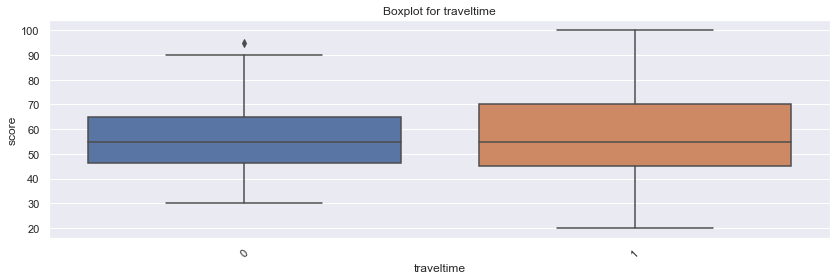

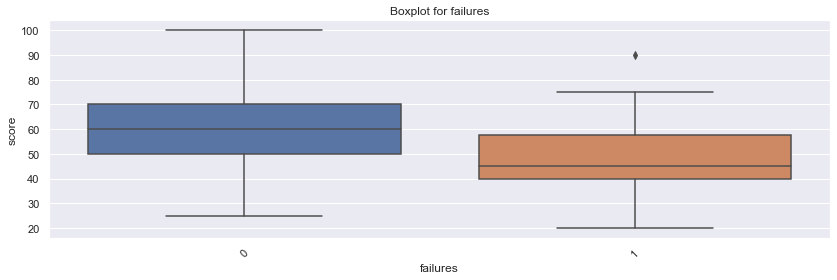

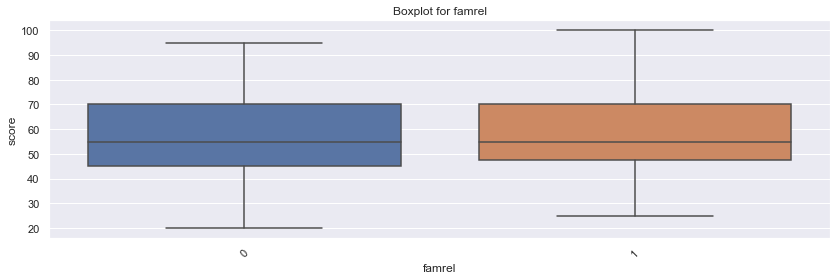

In [47]:
for col in bin_features:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме 'paid', могут влиять на оценку ученика по математике (хотя логика по идее должна говорить обратное. Чем больше "репетируешь" с репетитором - тем лучше должна быть оценка).  
Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок учеников по различным параметрам неразличимы:

In [48]:
#Воспользуемся функцией, которая была дана в примере
def get_stat_dif(column):
    cols = stud_mat.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_mat.loc[stud_mat.loc[:, column] == comb[0], 'score'], 
                        stud_mat.loc[stud_mat.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [49]:
for col in bin_features:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки failures


Как видим, целесообразно оставить в данных только признаки - 'address', 'schoolsup', 'failures'

In [50]:
bin_features = ['address', 'schoolsup', 'failures']

переведем бинарные признаки к виду 1/0

In [52]:
# напишем функцию, которая будет преобразовывать бинарный признак в 1/0
def zero_one(x):
    if x == one:
        return 1
    elif x == zero:
        return 0
    elif pd.isnull(x):
        return None
    else:
        return x

In [53]:
for column in stud_mat.columns:
    if len(stud_mat[column].value_counts().index[:]) == 2: #проверка, что признак бинарный
        one = stud_mat[column].value_counts().index[1]  #первый признак в единицы
        zero = stud_mat[column].value_counts().index[0]  #второй - в нули
        stud_mat[column] = stud_mat[column].apply(zero_one)

### Теперь посмотрим на категориальные признаки (с несколькими категориями)

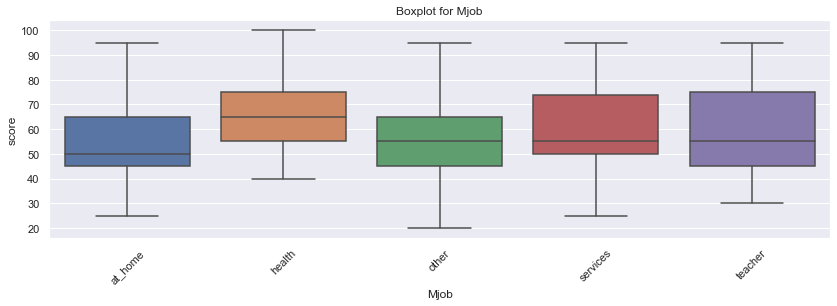

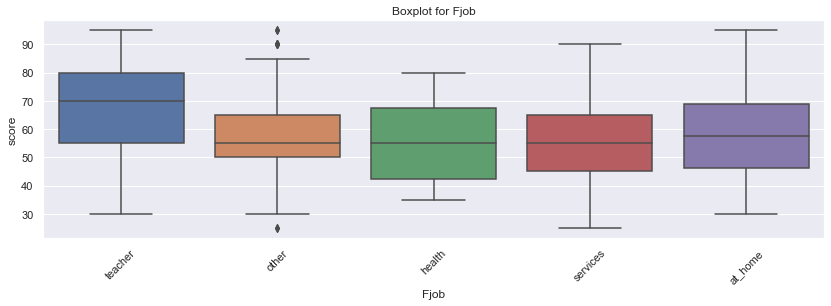

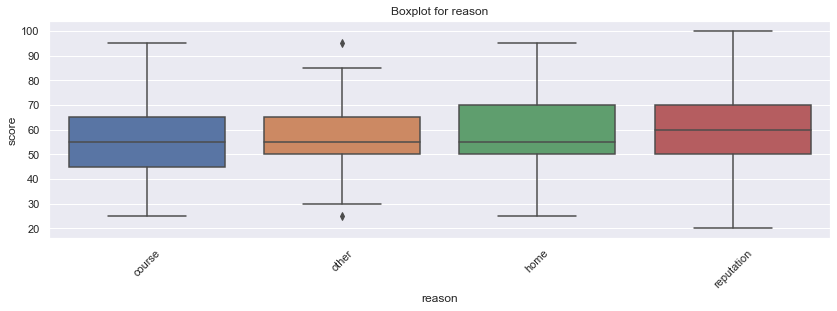

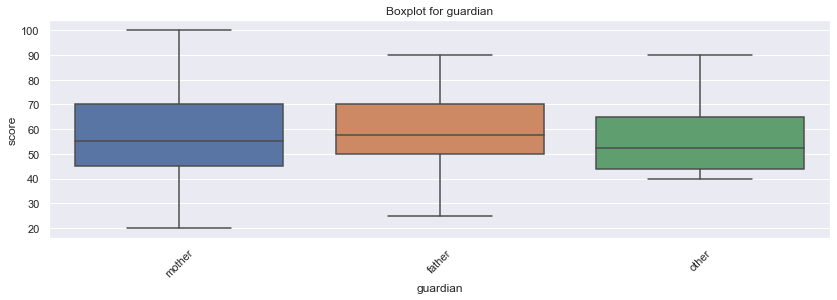

In [70]:
for col in cat_features:
    get_boxplot(col)

Визуально по графикам просматривается зависимость целевой переменной от таких показателей, как 'Fjob' и 'Mjob'. И практически отсутствие зависимости от признаков - 'reason', 'guardian'.  
Проверим теперь, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок учеников по различным параметрам неразличимы:

In [71]:
for col in cat_features:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob


Да, визуальный анализ и анализ с помощью теста Стьюдента совпал.  
Оставим в категориальных признаках только данные 'Fjob' и 'Mjob'. Очевидно, что для дальнейшего анализа нужно будет преобразовать эти столбцы через метод get_dummies()

In [72]:
cat_features = ['Fjob', 'Mjob']

Таким образом мы оставляем в финальном датасете следующие признаки: 'age', 'Medu', 'studytime', 'goout', 'health', 'absences', 'score', 'Fjob', 'Mjob', 'address', 'schoolsup', 'failures'.  
В категориальных и бинарных признаках также остались пропуски. Заполнить их нечем, поэтому просто удалим и посмотрим, что у нас получилось.

In [89]:
fin_features = num_features + cat_features + bin_features
fin_stud_mat = stud_mat[fin_features]
fin_stud_mat = fin_stud_mat.dropna()

In [90]:
fin_stud_mat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 12 columns):
age          352 non-null int64
Medu         352 non-null float64
studytime    352 non-null float64
goout        352 non-null float64
health       352 non-null float64
absences     352 non-null float64
score        352 non-null float64
Fjob         320 non-null object
Mjob         335 non-null object
address      352 non-null float64
schoolsup    329 non-null float64
failures     329 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 35.8+ KB


Как видим в итоге, при простом удалении строк - мы теряем слишком много данных (около 1/3).  
<font color = 'red'>Возможно имеет смысл заполнить пропуски, например, самой частой категорией. или подойти индивидуально, например пропуски Fjob и Mjob - заполнить как 'other'.</font>
Оставим шаманство с заполнением пропусков на этап построения предиктивной модели, а пока сделаем выводы: 


Итак, в результате EDA для анализа влияния признаков школьников на бал по математическому экзамену  были получены следующие выводы:

### Выводы
В данных достаточно мало пустых значений, но, если их просто удалять - теряется более 1/3 всех строк.  
Существенные выбросы найдены только в столбцах - 'famrel', и скорее всего - 'absences', что позволяет сделать вывод о том, что данные достаточно чистые.  
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это:  
 Числовые признаки - 'age', 'Medu', 'studytime', 'goout', 'health', 'absences'  
 Бинарные признаки - 'address', 'schoolsup', 'failures'  
 Категориальные признаки - 'Fjob', 'Mjob'  
 (удалять пропуски не будем, так как теряется очень много данных, а их и так не много)  
   
   Итак, итоговый датасет примет вид:

In [95]:
fin_stud_mat = stud_mat[fin_features]
fin_stud_mat.head()

,age,Medu,studytime,goout,health,absences,score,Fjob,Mjob,address,schoolsup,failures
0,18,4.0,2.0,4.0,3.0,6.0,30.0,teacher,at_home,0.0,1.0,0.0
1,17,1.0,2.0,3.0,3.0,4.0,30.0,other,at_home,0.0,0.0,0.0
2,15,1.0,2.0,2.0,3.0,10.0,50.0,other,at_home,0.0,1.0,1.0
3,15,2.0,3.0,2.0,5.0,2.0,75.0,NaN,health,0.0,0.0,0.0
4,16,3.0,2.0,2.0,5.0,4.0,50.0,other,other,0.0,0.0,0.0


In [105]:
fin_stud_mat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 12 columns):
age          352 non-null int64
Medu         352 non-null float64
studytime    352 non-null float64
goout        352 non-null float64
health       352 non-null float64
absences     352 non-null float64
score        352 non-null float64
Fjob         352 non-null object
Mjob         352 non-null object
address      352 non-null float64
schoolsup    352 non-null float64
failures     352 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 35.8+ KB


##### *Нельзя удержаться и не попробовать сделать предиктивную модель на основе имеющихся данных.

In [104]:
#уберем пропуски (заполним их самым частым значением)
fin_stud_mat['Mjob'] = fin_stud_mat['Mjob'].apply(lambda x: 'other' if pd.isnull(x) else x)
fin_stud_mat['Fjob'] = fin_stud_mat['Fjob'].apply(lambda x: 'other' if pd.isnull(x) else x)
fin_stud_mat['schoolsup'] = fin_stud_mat['schoolsup'].apply(lambda x: 0 if pd.isnull(x) else x)
fin_stud_mat['failures'] = fin_stud_mat['failures'].apply(lambda x: 0 if pd.isnull(x) else x)

In [110]:
#'Mjob' 'Fjob' переделаем через get_dummies
#df_with_dummies = pd.get_dummies(df, columns=['Gender', 'Smoker'])
fin_stud_mat = pd.get_dummies(fin_stud_mat, columns = ['Mjob', 'Fjob'])

In [111]:
fin_stud_mat.head()

,age,Medu,studytime,goout,health,absences,score,address,schoolsup,failures,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,18,4.0,2.0,4.0,3.0,6.0,30.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,1
1,17,1.0,2.0,3.0,3.0,4.0,30.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0
2,15,1.0,2.0,2.0,3.0,10.0,50.0,0.0,1.0,1.0,1,0,0,0,0,0,0,1,0,0
3,15,2.0,3.0,2.0,5.0,2.0,75.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0
4,16,3.0,2.0,2.0,5.0,4.0,50.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [112]:
X = fin_stud_mat.drop(['score'], axis = 1)
Y = fin_stud_mat[['score']]

In [131]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2)
model = LinearRegression()
model.fit(X_train, Y_train) #обучаем модель

LinearRegression()

In [132]:
Y_pred = model.predict(X_val)

In [134]:
mse = mean_squared_error(Y_val, Y_pred)
rmse = mse**0.5
result = rmse
print('MSE : ', mse, 'RMSE : ', rmse)

MSE :  206.95677102670754 RMSE :  14.385992180823244


RMSE получился около 15. 